# Fasttext

## 1. Importing Models

In [1]:
import numpy as np
import fasttext
import matplotlib.pyplot as plt

# Load the word embedding model
embedding_file = "leftL_modelP.bin"
model1 = fasttext.load_model(embedding_file)


# Load the second word embedding model
embedding_file2 = "rightC_modelP.bin"
model2 = fasttext.load_model(embedding_file2)

## 2.Defining Word sets

### 1. Strong vs Weak w.r.t Male vs Female

In [2]:
# Define the word groups
word_sets = {'strong_terms': ['power', 'strong', 'confident', 'dominant', 'potent', 'command', 'assert', 'loud','bold','succeed','triumph','leader','shout','dynamic','winner'],
             'weak_terms': ['weak', 'surrender', 'timid','vulnerable','weakness','wispy','withdraw','yield','failure','shy','follow','lose','fragile','afraid','loser'],
             'male_terms': ['man', 'male', 'boy', 'brother', 'father', 'he', 'him', 'his', 'son'],
             'female_terms': ['woman', 'female', 'girl', 'sister', 'mother', 'she', 'her', 'hers', 'daughter']}


## 3. For Cohen's D 

#### Step 1:

1. Calculating Means & Standard Deviation of Strong, weak terms for both models
2. Calculate the means and standard deviations for the male and female terms of both models


In [3]:
# Calculate the means and standard deviations for the strong and weak terms for first model
model1_strong_mean = np.mean([model1.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model1_strong_std = np.std([model1.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model1_weak_mean = np.mean([model1.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)
model1_weak_std = np.std([model1.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)


# Calculate the means and standard deviations for the strong and weak terms for second model
model2_strong_mean = np.mean([model2.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model2_strong_std = np.std([model2.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model2_weak_mean = np.mean([model2.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)
model2_weak_std = np.std([model2.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)



# Calculate the means and standard deviations for the male and female terms of first model 
model1_male_mean = np.mean([model1.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model1_male_std = np.std([model1.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model1_female_mean = np.mean([model1.get_word_vector(w) for w in word_sets['female_terms']], axis=0)
model1_female_std = np.std([model1.get_word_vector(w) for w in word_sets['female_terms']], axis=0)


# Calculate the means and standard deviations for the male and female terms of first model 
model2_male_mean = np.mean([model2.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model2_male_std = np.std([model2.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model2_female_mean = np.mean([model2.get_word_vector(w) for w in word_sets['female_terms']], axis=0)
model2_female_std = np.std([model2.get_word_vector(w) for w in word_sets['female_terms']], axis=0)


### Step 2:

For Cohen's D , calculating pool value


1. Cohen's d = (mean1 - mean2) / pooled_standard_deviation

2. pooled_standard_deviation = sqrt(((n1 - 1) * std1^2 + (n2 - 1) * std2^2) / (n1 + n2 - 2))



In [4]:
# Calculate Cohen's d for male and female with respect to strong and weak terms for model 1
s_pooled_strong_male_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_weak_male_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_strong_female_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_weak_female_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))

cohens_d_male_strong_model1 = (model1_male_mean - model1_strong_mean) / s_pooled_strong_male_model1
cohens_d_male_weak_model1 = (model1_male_mean - model1_weak_mean) / s_pooled_weak_male_model1
cohens_d_female_strong_model1 = (model1_female_mean - model1_strong_mean) / s_pooled_strong_female_model1
cohens_d_female_weak_model1 = (model1_female_mean - model1_weak_mean) / s_pooled_weak_female_model1

# Calculate Cohen's d for male and female with respect to strong and weak terms for model 2
s_pooled_strong_male_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_weak_male_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_strong_female_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_weak_female_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))


cohens_d_male_strong_model2 = (model2_male_mean - model2_strong_mean) / s_pooled_strong_male_model2
cohens_d_male_weak_model2 = (model2_male_mean - model2_weak_mean) / s_pooled_weak_male_model2
cohens_d_female_strong_model2 = (model2_female_mean - model2_strong_mean) / s_pooled_strong_female_model2
cohens_d_female_weak_model2 = (model2_female_mean - model2_weak_mean) / s_pooled_weak_female_model2


### 3. Results

In [5]:
print("Cohen's d for male with respect to strong terms for model 1:", cohens_d_male_strong_model1)
print("Cohen's d for male with respect to weak terms for model 1:", cohens_d_male_weak_model1)
print("Cohen's d for female with respect to strong terms for model 1:", cohens_d_female_strong_model1)
print("Cohen's d for female with respect to weak terms for model 1:", cohens_d_female_weak_model1)

print("Cohen's d for male with respect to strong terms for model 2:", cohens_d_male_strong_model2)
print("Cohen's d for male with respect to weak terms for model 2:", cohens_d_male_weak_model2)
print("Cohen's d for female with respect to strong terms for model 2:", cohens_d_female_strong_model2)
print("Cohen's d for female with respect to weak terms for model 2:", cohens_d_female_weak_model2)


Cohen's d for male with respect to strong terms for model 1: [-0.1370527  -1.3531555   3.0953698  -1.408967    0.44933718 -1.1838273
 -1.6387008   0.38288102  2.058906   -0.5701198  -1.8640356  -1.0096883
  1.0736328   0.48350114 -0.55939895 -1.2342705  -0.04405562 -1.8541694
  0.3173134   0.95385224 -1.2345606   0.46851936  0.76617545  1.0966781
 -2.3018043  -1.5792378  -0.33700204 -1.9663843  -0.05832345  0.97494465
 -1.2601805   1.6223325  -2.3203743  -0.31316683  1.497978    2.0242157
  0.18593776 -0.17837253 -0.33354712  0.52893525  0.6611309  -1.9012707
  0.93919253  0.18547143  0.886812   -0.6126919  -0.54559034 -0.6408986
  0.34933138  0.2911599  -0.5858836   1.3653471   0.4178257  -2.1248014
  1.9328226  -0.52430284 -0.38802323 -0.96508133 -0.28325257  1.3016503
 -1.4547209  -0.5452951  -0.20828107  0.7605144  -0.4631448  -0.79056543
 -0.38627204 -1.6585346  -1.7422357  -0.22601634  2.6960318   0.7768674
 -2.8542538  -0.56305826  2.076784   -1.0158762   0.11753026  0.87955874


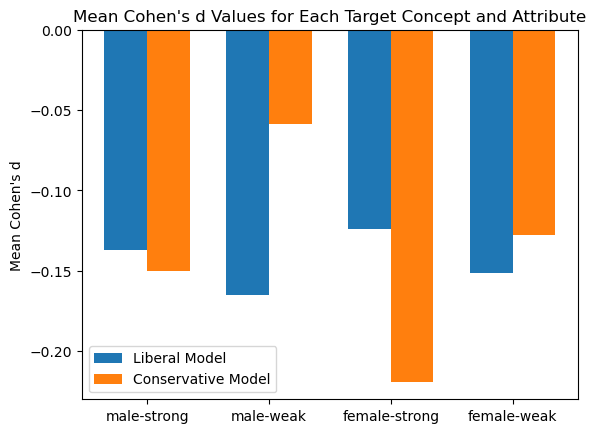

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# define the x values
x = np.arange(4)

# calculate the mean Cohen's d values across all attribute words for each target concept and attribute
model1_values = [np.mean(cohens_d_male_strong_model1), np.mean(cohens_d_male_weak_model1), 
                 np.mean(cohens_d_female_strong_model1), np.mean(cohens_d_female_weak_model1)]
model2_values = [np.mean(cohens_d_male_strong_model2), np.mean(cohens_d_male_weak_model2), 
                 np.mean(cohens_d_female_strong_model2), np.mean(cohens_d_female_weak_model2)]

# define the width of each bar
width = 0.35

# create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Liberal Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Conservative Model')

# add labels, title, and legend
ax.set_ylabel("Mean Cohen's d")
ax.set_title("Mean Cohen's d Values for Each Target Concept and Attribute")
ax.set_xticks(x)
ax.set_xticklabels(["male-strong", "male-weak", "female-strong", "female-weak"])
ax.legend()

plt.show()


1. If Cohen's d is 0, there is no difference between the groups.


2. If Cohen's d is between 0 and 0.2, the difference is considered small.


3. If Cohen's d is between 0.2 and 0.5, the difference is considered medium.


4. If Cohen's d is greater than 0.5, the difference is considered large.

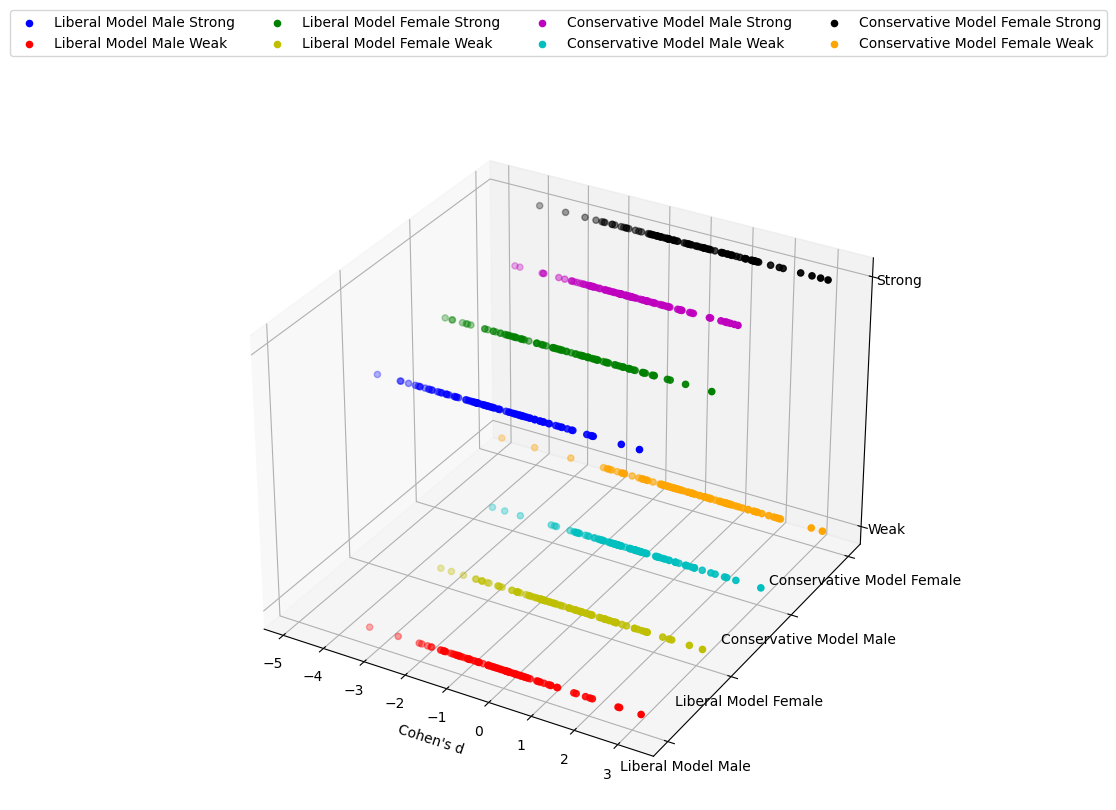

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Cohen's d values for males and females with respect to strong and weak terms in both models
model1_male_strong = cohens_d_male_strong_model1
model1_male_weak = cohens_d_male_weak_model1
model1_female_strong = cohens_d_female_strong_model1
model1_female_weak = cohens_d_female_weak_model1
model2_male_strong = cohens_d_male_strong_model2
model2_male_weak = cohens_d_male_weak_model2
model2_female_strong = cohens_d_female_strong_model2
model2_female_weak = cohens_d_female_weak_model2

# Scatter plot for model 1
ax.scatter(model1_male_strong, np.zeros_like(model1_male_strong), np.ones_like(model1_male_strong), 
           marker='o', color='b', label="Liberal Model Male Strong")
ax.scatter(model1_male_weak, np.zeros_like(model1_male_weak), np.zeros_like(model1_male_weak), 
           marker='o', color='r', label="Liberal Model Male Weak")
ax.scatter(model1_female_strong, np.ones_like(model1_female_strong), np.ones_like(model1_female_strong), 
           marker='o', color='g', label="Liberal Model Female Strong")
ax.scatter(model1_female_weak, np.ones_like(model1_female_weak), np.zeros_like(model1_female_weak), 
           marker='o', color='y', label="Liberal Model Female Weak")

# Scatter plot for model 2
ax.scatter(model2_male_strong, 2*np.ones_like(model2_male_strong), np.ones_like(model2_male_strong), 
           marker='o', color='m', label="Conservative Model Male Strong")
ax.scatter(model2_male_weak, 2*np.ones_like(model2_male_weak), np.zeros_like(model2_male_weak), 
           marker='o', color='c', label="Conservative Model Male Weak")
ax.scatter(model2_female_strong, 3*np.ones_like(model2_female_strong), np.ones_like(model2_female_strong), 
           marker='o', color='k', label="Conservative Model Female Strong")
ax.scatter(model2_female_weak, 3*np.ones_like(model2_female_weak), np.zeros_like(model2_female_weak), 
           marker='o', color='orange', label="Conservative Model Female Weak")

# Set the axis labels and legend
ax.set_xlabel("Cohen's d")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Liberal Model Male', 'Liberal Model Female', 'Conservative Model Male', 'Conservative Model Female'])
ax.set_zticks([0,1])
ax.set_zticklabels(['Weak', 'Strong'])

# Adjust legend position
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.show()


Since the Cohen's d values can be positive or negative, you can tell the positive and negative values by looking at the direction of the points along the x-axis. For example, if a point is located to the right of the origin, it represents a positive Cohen's d value, and if it is located to the left of the origin, it represents a negative Cohen's d value.

### 

### 2. Strong vs Weak w.r.t Islam vs Christianity 

In [64]:
# Define the word groups
word_sets = {'strong_terms': ['power', 'strong', 'confident', 'dominant', 'potent', 'command', 'assert', 'loud','bold','succeed','triumph','leader','shout','dynamic','winner'],
             'weak_terms': ['weak', 'surrender', 'timid','vulnerable','weakness','wispy','withdraw','yield','failure','shy','follow','lose','fragile','afraid','loser'],
             'islam_terms': ['islam', 'muslim', 'allah', 'muhammad', 'hijab', 'quran', 'ramadan', 'mecca'],
             'christianity_terms': ['christian', 'jesus', 'bible', 'church', 'god', 'prayer', 'angel', 'saint']}


In [65]:
import numpy as np

# Calculate the means and standard deviations for the strong and weak terms for first model
model1_strong_mean = np.mean([model1.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model1_strong_std = np.std([model1.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model1_weak_mean = np.mean([model1.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)
model1_weak_std = np.std([model1.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)


# Calculate the means and standard deviations for the strong and weak terms for second model
model2_strong_mean = np.mean([model2.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model2_strong_std = np.std([model2.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model2_weak_mean = np.mean([model2.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)
model2_weak_std = np.std([model2.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)



# Calculate the means and standard deviations for the male and female terms of first model 
model1_islam_mean = np.mean([model1.get_word_vector(w) for w in word_sets['islam_terms']], axis=0)
model1_islam_std = np.std([model1.get_word_vector(w) for w in word_sets['islam_terms']], axis=0)
model1_christianity_mean = np.mean([model1.get_word_vector(w) for w in word_sets['christianity_terms']], axis=0)
model1_christianity_std = np.std([model1.get_word_vector(w) for w in word_sets['christianity_terms']], axis=0)


# Calculate the means and standard deviations for the male and female terms of first model 
model2_islam_mean = np.mean([model2.get_word_vector(w) for w in word_sets['islam_terms']], axis=0)
model2_islam_std = np.std([model2.get_word_vector(w) for w in word_sets['islam_terms']], axis=0)
model2_christianity_mean = np.mean([model2.get_word_vector(w) for w in word_sets['christianity_terms']], axis=0)
model2_christianity_std = np.std([model2.get_word_vector(w) for w in word_sets['christianity_terms']], axis=0)

In [66]:
# Calculate Cohen's d for islam and christianity with respect to strong and weak terms for model 1
s_pooled_strong_islam_model1 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model1_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model1_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))
s_pooled_weak_islam_model1 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model1_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model1_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))
s_pooled_strong_christianity_model1 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model1_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model1_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))
s_pooled_weak_christianity_model1 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model1_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model1_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))

cohens_d_islam_strong_model1 = (model1_islam_mean - model1_strong_mean) / s_pooled_strong_islam_model1
cohens_d_islam_weak_model1 = (model1_islam_mean - model1_weak_mean) / s_pooled_weak_islam_model1
cohens_d_christianity_strong_model1 = (model1_christianity_mean - model1_strong_mean) / s_pooled_strong_christianity_model1
cohens_d_christianity_weak_model1 = (model1_christianity_mean - model1_weak_mean) / s_pooled_weak_christianity_model1

# Calculate Cohen's d for islam and christianity with respect to strong and weak terms for model 2
s_pooled_strong_islam_model2 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model2_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model2_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))
s_pooled_weak_islam_model2 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model2_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model2_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))
s_pooled_strong_christianity_model2 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model2_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model2_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))
s_pooled_weak_christianity_model2 = np.sqrt(((len(word_sets['islam_terms']) - 1) * np.square(model2_islam_std) + (len(word_sets['christianity_terms']) - 1) * np.square(model2_christianity_std)) / (len(word_sets['islam_terms']) + len(word_sets['christianity_terms']) - 2))


cohens_d_islam_strong_model2 = (model2_male_mean - model2_strong_mean) / s_pooled_strong_islam_model2
cohens_d_islam_weak_model2 = (model2_male_mean - model2_weak_mean) / s_pooled_weak_islam_model2
cohens_d_christianity_strong_model2 = (model2_female_mean - model2_strong_mean) / s_pooled_strong_christianity_model2
cohens_d_christianity_weak_model2 = (model2_female_mean - model2_weak_mean) / s_pooled_weak_christianity_model2

In [67]:
print("Cohen's d for male with respect to strong terms for model 1:", cohens_d_islam_strong_model1)
print("Cohen's d for male with respect to weak terms for model 1:", cohens_d_islam_weak_model1)
print("Cohen's d for female with respect to strong terms for model 1:", cohens_d_christianity_strong_model1)
print("Cohen's d for female with respect to weak terms for model 1:", cohens_d_christianity_weak_model1)

print("Cohen's d for male with respect to strong terms for model 2:", cohens_d_islam_strong_model2)
print("Cohen's d for male with respect to weak terms for model 2:", cohens_d_islam_weak_model2)
print("Cohen's d for female with respect to strong terms for model 2:", cohens_d_christianity_strong_model2)
print("Cohen's d for female with respect to weak terms for model 2:", cohens_d_christianity_weak_model2)


Cohen's d for male with respect to strong terms for model 1: [ 0.05536468 -0.05579205  0.8257264   0.6970771   0.3925801   1.0101135
 -1.1730682  -0.56534946  0.7788452  -0.3795849  -1.5779624   0.1241363
  1.8285362  -0.37545696 -0.5309662  -1.4750555   0.84037185 -1.043477
 -1.2476168   0.95126706 -0.24457976 -0.00569759 -0.18983766  0.19204459
 -0.36129737 -0.31199345 -0.6409531  -0.05946025  1.2068474   0.6368382
 -0.45992613  0.47647363 -1.2059623  -0.9790929   1.432599    0.29346514
  0.8244547  -0.98136896 -0.7784522   1.0741372   0.12190276 -0.6759284
 -1.72746    -0.53675437 -0.2635404   0.6067424  -0.13179259 -0.6520647
  0.5199092   1.6494439  -1.6582431   0.9828822   0.45743883 -1.4701629
  0.9538324  -0.06677827  0.16161317 -0.65850455  0.47384438  0.4526259
 -1.3981816   0.769293   -0.09732221  0.49810308  0.4493988   0.15725051
  0.09520138 -1.4548789  -0.9020488  -0.48075894  1.5879108   0.51385343
 -1.3820262  -0.14197646 -0.45868716 -0.47021013 -0.58025616  0.7461373


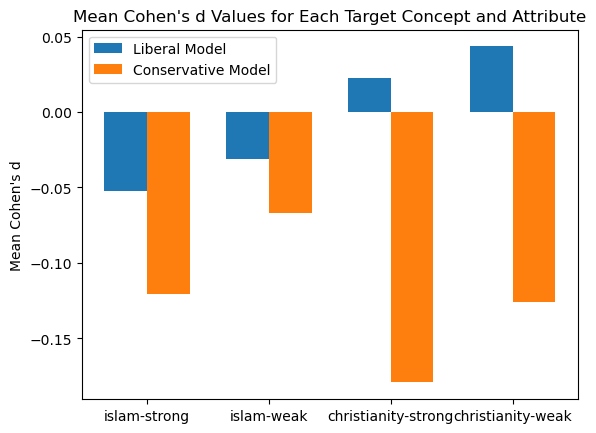

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# define the x values
x = np.arange(4)

# calculate the mean Cohen's d values across all attribute words for each target concept and attribute
model1_values = [np.mean(cohens_d_islam_strong_model1), np.mean(cohens_d_islam_weak_model1), 
                 np.mean(cohens_d_christianity_strong_model1), np.mean(cohens_d_christianity_weak_model1)]
model2_values = [np.mean(cohens_d_islam_strong_model2), np.mean(cohens_d_islam_weak_model2), 
                 np.mean(cohens_d_christianity_strong_model2), np.mean(cohens_d_christianity_weak_model2)]

# define the width of each bar
width = 0.35

# create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Liberal Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Conservative Model')

# add labels, title, and legend
ax.set_ylabel("Mean Cohen's d")
ax.set_title("Mean Cohen's d Values for Each Target Concept and Attribute")
ax.set_xticks(x)
ax.set_xticklabels(["islam-strong", "islam-weak", "christianity-strong", "christianity-weak"])
ax.legend()

plt.show()

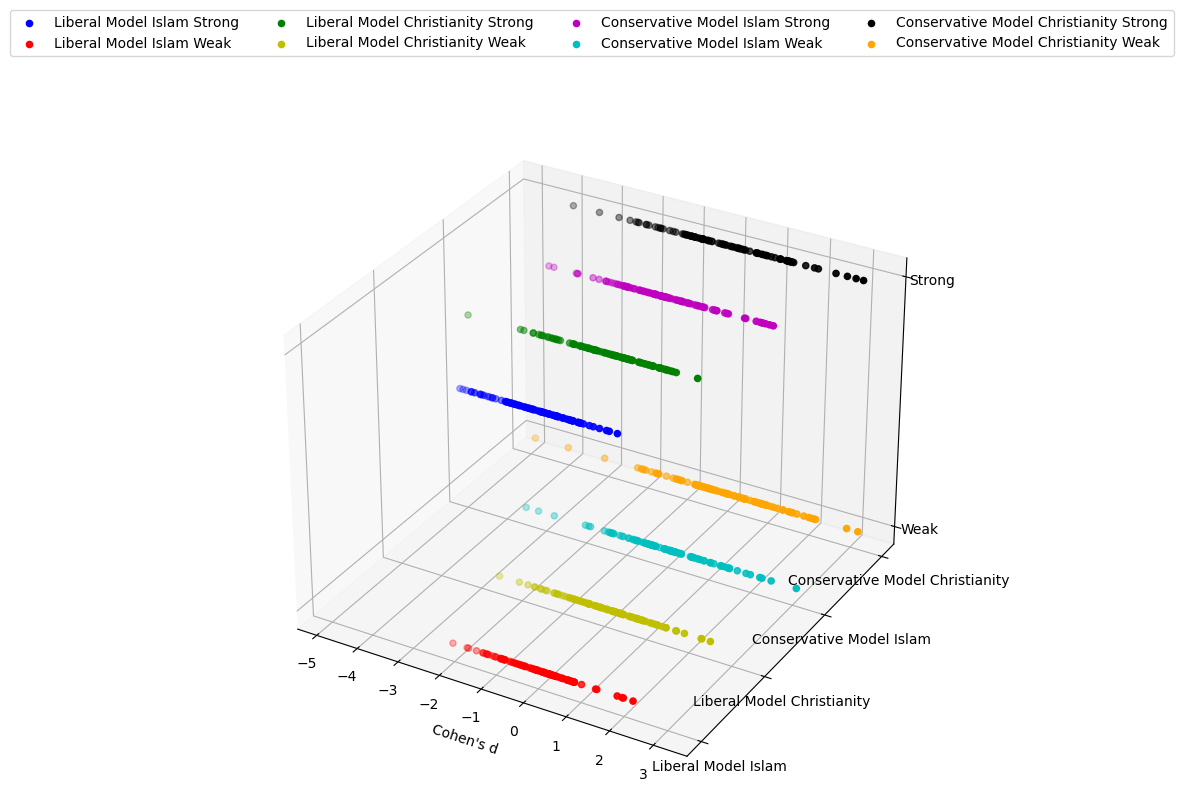

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Cohen's d values for islam and christianity with respect to strong and weak terms in both models
model1_islam_strong = cohens_d_islam_strong_model1
model1_islam_weak = cohens_d_islam_weak_model1
model1_christianity_strong = cohens_d_christianity_strong_model1
model1_christianity_weak = cohens_d_christianity_weak_model1
model2_islam_strong = cohens_d_islam_strong_model2
model2_islam_weak = cohens_d_islam_weak_model2
model2_christianity_strong = cohens_d_christianity_strong_model2
model2_christianity_weak = cohens_d_christianity_weak_model2

# Scatter plot for model 1
ax.scatter(model1_male_strong, np.zeros_like(model1_male_strong), np.ones_like(model1_islam_strong), 
           marker='o', color='b', label="Liberal Model Islam Strong")
ax.scatter(model1_male_weak, np.zeros_like(model1_male_weak), np.zeros_like(model1_islam_weak), 
           marker='o', color='r', label="Liberal Model Islam Weak")
ax.scatter(model1_female_strong, np.ones_like(model1_female_strong), np.ones_like(model1_christianity_strong), 
           marker='o', color='g', label="Liberal Model Christianity Strong")
ax.scatter(model1_female_weak, np.ones_like(model1_female_weak), np.zeros_like(model1_christianity_weak), 
           marker='o', color='y', label="Liberal Model Christianity Weak")

# Scatter plot for model 2
ax.scatter(model2_male_strong, 2*np.ones_like(model2_male_strong), np.ones_like(model2_islam_strong), 
           marker='o', color='m', label="Conservative Model Islam Strong")
ax.scatter(model2_male_weak, 2*np.ones_like(model2_male_weak), np.zeros_like(model2_islam_weak), 
           marker='o', color='c', label="Conservative Model Islam Weak")
ax.scatter(model2_female_strong, 3*np.ones_like(model2_female_strong), np.ones_like(model2_christianity_strong), 
           marker='o', color='k', label="Conservative Model Christianity Strong")
ax.scatter(model2_female_weak, 3*np.ones_like(model2_female_weak), np.zeros_like(model2_christianity_weak), 
           marker='o', color='orange', label="Conservative Model Christianity Weak")

# Set the axis labels and legend
ax.set_xlabel("Cohen's d")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Liberal Model Islam', 'Liberal Model Christianity', 'Conservative Model Islam', 'Conservative Model Christianity'])
ax.set_zticks([0,1])
ax.set_zticklabels(['Weak', 'Strong'])

# Adjust legend position
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.show()


##  Strong vs Weak w.r.t Race group

In [72]:
# Define the word groups
word_sets = {'strong_terms': ['power', 'strong', 'confident', 'dominant', 'potent', 'command', 'assert', 'loud','bold','succeed','triumph','leader','shout','dynamic','winner'],
             'weak_terms': ['weak', 'surrender', 'timid','vulnerable','weakness','wispy','withdraw','yield','failure','shy','follow','lose','fragile','afraid','loser'],
             'white_terms':['caucasian', 'white'],'black_terms': ['african', 'black']}

In [73]:
import numpy as np

# Calculate the means and standard deviations for the strong and weak terms for first model
model1_strong_mean = np.mean([model1.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model1_strong_std = np.std([model1.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model1_weak_mean = np.mean([model1.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)
model1_weak_std = np.std([model1.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)


# Calculate the means and standard deviations for the strong and weak terms for second model
model2_strong_mean = np.mean([model2.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model2_strong_std = np.std([model2.get_word_vector(w) for w in word_sets['strong_terms']], axis=0)
model2_weak_mean = np.mean([model2.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)
model2_weak_std = np.std([model2.get_word_vector(w) for w in word_sets['weak_terms']], axis=0)



# Calculate the means and standard deviations for the white and black terms of first model 
model1_white_mean = np.mean([model1.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model1_white_std = np.std([model1.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model1_black_mean = np.mean([model1.get_word_vector(w) for w in word_sets['black_terms']], axis=0)
model1_black_std = np.std([model1.get_word_vector(w) for w in word_sets['black_terms']], axis=0)


# Calculate the means and standard deviations for the white and black terms of first model 
model2_white_mean = np.mean([model2.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model2_white_std = np.std([model2.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model2_black_mean = np.mean([model2.get_word_vector(w) for w in word_sets['black_terms']], axis=0)
model2_black_std = np.std([model2.get_word_vector(w) for w in word_sets['black_terms']], axis=0)

In [74]:
# Calculate Cohen's d for white and black with respect to strong and weak terms for model 1
s_pooled_strong_white_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_weak_white_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_strong_black_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_weak_black_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))

cohens_d_white_strong_model1 = (model1_white_mean - model1_strong_mean) / s_pooled_strong_white_model1
cohens_d_white_weak_model1 = (model1_white_mean - model1_weak_mean) / s_pooled_weak_white_model1
cohens_d_black_strong_model1 = (model1_black_mean - model1_strong_mean) / s_pooled_strong_black_model1
cohens_d_black_weak_model1 = (model1_black_mean - model1_weak_mean) / s_pooled_weak_black_model1

# Calculate Cohen's d for white and black with respect to strong and weak terms for model 2
s_pooled_strong_white_model2 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_weak_white_model2 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_strong_black_model2 = np.sqrt(((len(word_sets['black_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_weak_black_model2 = np.sqrt(((len(word_sets['black_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))


cohens_d_white_strong_model2 = (model2_male_mean - model2_strong_mean) / s_pooled_strong_white_model2
cohens_d_white_weak_model2 = (model2_male_mean - model2_weak_mean) / s_pooled_weak_white_model2
cohens_d_black_strong_model2 = (model2_female_mean - model2_strong_mean) / s_pooled_strong_black_model2
cohens_d_black_weak_model2 = (model2_female_mean - model2_weak_mean) / s_pooled_weak_black_model2

In [75]:
print("Cohen's d for white with respect to strong terms for model 1:", cohens_d_white_strong_model1)
print("Cohen's d for white with respect to weak terms for model 1:", cohens_d_white_weak_model1)
print("Cohen's d for black with respect to strong terms for model 1:", cohens_d_black_strong_model1)
print("Cohen's d for black with respect to weak terms for model 1:", cohens_d_black_weak_model1)

print("Cohen's d for white with respect to strong terms for model 2:", cohens_d_white_strong_model2)
print("Cohen's d for white with respect to weak terms for model 2:", cohens_d_white_weak_model2)
print("Cohen's d for black with respect to strong terms for model 2:", cohens_d_black_strong_model2)
print("Cohen's d for black with respect to weak terms for model 2:", cohens_d_black_weak_model2)

Cohen's d for white with respect to strong terms for model 1: [-1.251559   -1.4411205   1.8043158  -3.1571233   4.7682514  -0.45215452
 -2.0534601   0.4787541   0.35977998 -0.4831314  -7.38487    -1.38218
  2.367562   -6.7876863  -0.66976315 -3.736535    2.7318537  -5.0484667
 -1.5984044  -0.77151257  1.6040074  -3.716378    3.456865    4.415226
 -1.2002509  -7.8852797  -1.2058223  -0.20429307 -2.505572    1.557526
 -0.28162873  3.2419677  -1.9785653   0.90467834 -0.62094903  8.13873
  3.0315962  -1.1810069  -2.385784    3.2984068   1.0793886   1.0580626
 -8.717203    0.5266811   1.3358212   1.806986   -0.6045247   1.1691625
  6.688393    3.1069894  -2.5150864   1.1417205  -0.5017513  -2.7602813
  2.201395    2.164953   -1.0198284   3.1457162  -0.34731814  2.1308618
  7.4168715  -0.86016524 -1.6598458  -0.7799841  -1.5862772   0.8481232
 -0.5564652  -6.6233807  -6.4922404   1.3121448   3.7431467   0.32897156
 -6.293418    1.7059904   4.0276237   9.652549   -2.3834648   2.451157
  3.007

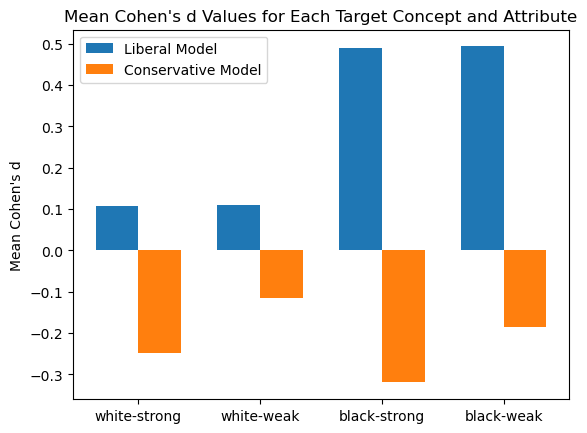

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# define the x values
x = np.arange(4)

# calculate the mean Cohen's d values across all attribute words for each target concept and attribute
model1_values = [np.mean(cohens_d_white_strong_model1), np.mean(cohens_d_white_weak_model1), 
                 np.mean(cohens_d_black_strong_model1), np.mean(cohens_d_black_weak_model1)]
model2_values = [np.mean(cohens_d_white_strong_model2), np.mean( cohens_d_white_weak_model2), 
                 np.mean(cohens_d_black_strong_model2), np.mean(cohens_d_black_weak_model2)]

# define the width of each bar
width = 0.35

# create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Liberal Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Conservative Model')

# add labels, title, and legend
ax.set_ylabel("Mean Cohen's d")
ax.set_title("Mean Cohen's d Values for Each Target Concept and Attribute")
ax.set_xticks(x)
ax.set_xticklabels(["white-strong", "white-weak", "black-strong", "black-weak"])
ax.legend()

plt.show()

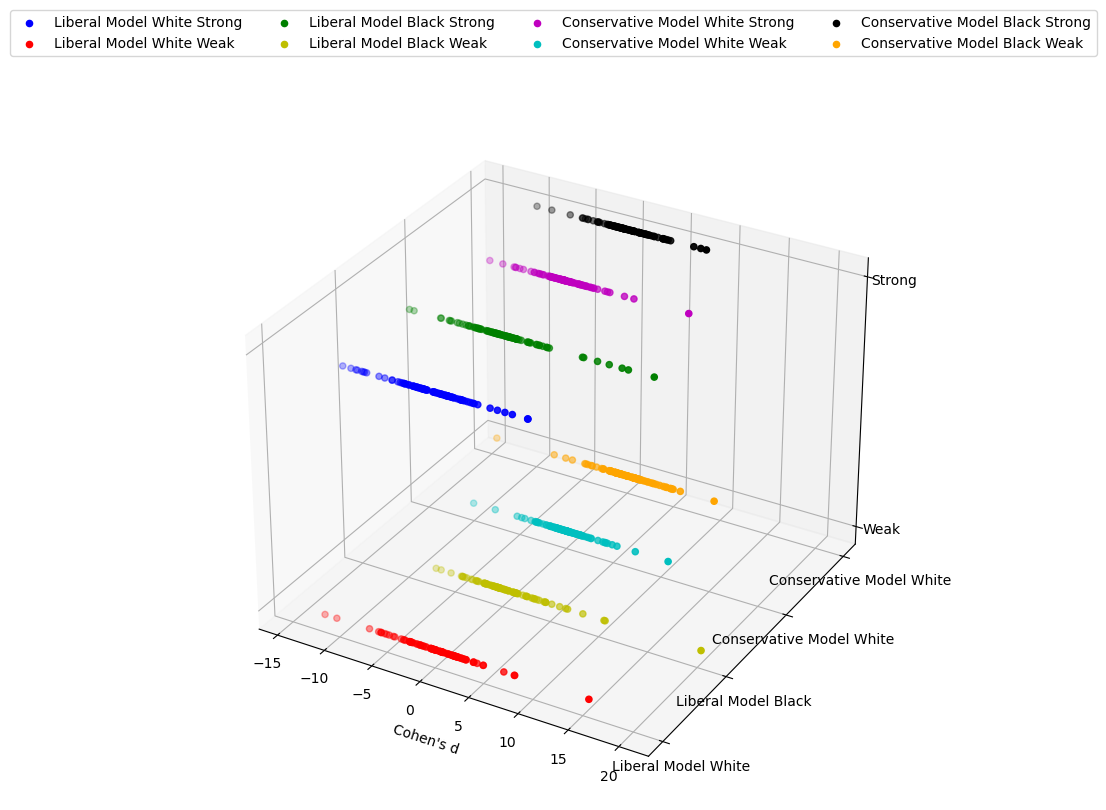

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Cohen's d values for males and females with respect to strong and weak terms in both models
model1_white_strong = cohens_d_white_strong_model1
model1_white_weak = cohens_d_white_weak_model1
model1_black_strong = cohens_d_black_strong_model1
model1_black_weak = cohens_d_black_weak_model1
model2_white_strong = cohens_d_white_strong_model2
model2_white_weak = cohens_d_white_weak_model2
model2_black_strong = cohens_d_black_strong_model2
model2_black_weak = cohens_d_black_weak_model2

# Scatter plot for model 1
ax.scatter(model1_white_strong, np.zeros_like(model1_white_strong), np.ones_like(model1_white_strong), 
           marker='o', color='b', label="Liberal Model White Strong")
ax.scatter(model1_white_weak, np.zeros_like(model1_white_weak), np.zeros_like(model1_white_weak), 
           marker='o', color='r', label="Liberal Model White Weak")
ax.scatter(model1_black_strong, np.ones_like(model1_black_strong), np.ones_like(model1_black_strong), 
           marker='o', color='g', label="Liberal Model Black Strong")
ax.scatter(model1_black_weak, np.ones_like(model1_black_weak), np.zeros_like(model1_black_weak), 
           marker='o', color='y', label="Liberal Model Black Weak")

# Scatter plot for model 2
ax.scatter(model2_white_strong, 2*np.ones_like(model2_white_strong), np.ones_like(model2_white_strong), 
           marker='o', color='m', label="Conservative Model White Strong")
ax.scatter(model2_white_weak, 2*np.ones_like(model2_white_weak), np.zeros_like(model2_white_weak), 
           marker='o', color='c', label="Conservative Model White Weak")
ax.scatter(model2_black_strong, 3*np.ones_like(model2_black_strong), np.ones_like(model2_black_strong), 
           marker='o', color='k', label="Conservative Model Black Strong")
ax.scatter(model2_black_weak, 3*np.ones_like(model2_black_weak), np.zeros_like(model2_black_weak), 
           marker='o', color='orange', label="Conservative Model Black Weak")

# Set the axis labels and legend
ax.set_xlabel("Cohen's d")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Liberal Model White', 'Liberal Model Black', 'Conservative Model White', 'Conservative Model White'])
ax.set_zticks([0,1])
ax.set_zticklabels(['Weak', 'Strong'])

# Adjust legend position
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.show()


## Intelligence vs Appearance w.r.t male vs female

In [78]:
# Define the word groups
word_sets = {'intelligence_terms' : ['precocious', 'resourceful', 'inquisitive', 'genius', 'inventive', 
                                   'astute', 'adaptable', 'reflective'],
                'appearance_terms' : ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual',
                                 'gorgeous', 'slim'],
                'male_terms': ['man', 'male', 'boy', 'brother', 'father', 'he', 'him', 'his', 'son'],
                'female_terms': ['woman', 'female', 'girl', 'sister', 'mother', 'she', 'her', 'hers', 'daughter']}


In [79]:
import numpy as np

# Calculate the means and standard deviations for the intelligence and appearance terms for first model
model1_intelligence_mean = np.mean([model1.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model1_intelligence_std = np.std([model1.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model1_appearance_mean = np.mean([model1.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)
model1_appearance_std = np.std([model1.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)


# Calculate the means and standard deviations for the intelligence and appearance terms for second model
model2_intelligence_mean = np.mean([model2.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model2_intelligence_std = np.std([model2.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model2_appearance_mean = np.mean([model2.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)
model2_appearance_std = np.std([model2.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)



# Calculate the means and standard deviations for the male and female terms of first model 
model1_male_mean = np.mean([model1.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model1_male_std = np.std([model1.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model1_female_mean = np.mean([model1.get_word_vector(w) for w in word_sets['female_terms']], axis=0)
model1_female_std = np.std([model1.get_word_vector(w) for w in word_sets['female_terms']], axis=0)


# Calculate the means and standard deviations for the male and female terms of first model 
model2_male_mean = np.mean([model2.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model2_male_std = np.std([model2.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model2_female_mean = np.mean([model2.get_word_vector(w) for w in word_sets['female_terms']], axis=0)
model2_female_std = np.std([model2.get_word_vector(w) for w in word_sets['female_terms']], axis=0)


In [80]:
# Calculate Cohen's d for male and female with respect to intelligence and appearance terms for model 1
s_pooled_intelligence_male_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_appearance_male_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_intelligence_female_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_appearance_female_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))

cohens_d_male_intelligence_model1 = (model1_male_mean - model1_intelligence_mean) / s_pooled_intelligence_male_model1
cohens_d_male_appearance_model1 = (model1_male_mean - model1_appearance_mean) / s_pooled_appearance_male_model1
cohens_d_female_intelligence_model1 = (model1_female_mean - model1_intelligence_mean) / s_pooled_intelligence_female_model1
cohens_d_female_appearance_model1 = (model1_female_mean - model1_appearance_mean) / s_pooled_appearance_female_model1

# Calculate Cohen's d for male and female with respect to intelligence and appearance terms for model 2
s_pooled_intelligence_male_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_appearance_male_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_intelligence_female_model2 = np.sqrt(((len(word_sets['female_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_appearance_female_model2 = np.sqrt(((len(word_sets['female_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))


cohens_d_male_intelligence_model2 = (model2_male_mean - model2_intelligence_mean) / s_pooled_intelligence_male_model2
cohens_d_male_appearance_model2 = (model2_male_mean - model2_appearance_mean) / s_pooled_appearance_male_model2
cohens_d_female_intelligence_model2 = (model2_female_mean - model2_intelligence_mean) / s_pooled_intelligence_female_model2
cohens_d_female_appearance_model2 = (model2_female_mean - model2_appearance_mean) / s_pooled_appearance_female_model2


In [81]:
print("Cohen's d for male with respect to intelligence terms for model 1:", cohens_d_male_intelligence_model1)
print("Cohen's d for male with respect to appearance terms for model 1:", cohens_d_male_appearance_model1)
print("Cohen's d for female with respect to intelligence terms for model 1:", cohens_d_female_intelligence_model1)
print("Cohen's d for female with respect to appearance terms for model 1:", cohens_d_female_appearance_model1)

print("Cohen's d for male with respect to intelligence terms for model 2:", cohens_d_male_intelligence_model2)
print("Cohen's d for male with respect to appearance terms for model 2:", cohens_d_male_appearance_model2)
print("Cohen's d for female with respect to intelligence terms for model 2:", cohens_d_female_intelligence_model2)
print("Cohen's d for female with respect to appearance terms for model 2:", cohens_d_female_appearance_model2)


Cohen's d for male with respect to intelligence terms for model 1: [ 7.5654858e-01 -2.0165801e+00  1.2131785e+00 -1.2424406e+00
  1.4548255e+00 -8.2885814e-01 -5.0062370e-01 -9.7436354e-02
  8.2054728e-01  8.0530882e-02 -1.2363356e+00 -1.1810864e+00
  4.7654405e-01  6.0035729e-01 -1.1127047e-01 -3.5435057e-01
 -7.4791241e-01 -4.3203032e-01  9.6596009e-01  7.9358906e-01
 -3.9291594e+00  2.6442343e-01  3.2343152e-01 -3.9968318e-01
 -2.6935391e+00 -1.5733399e+00 -1.3784606e+00 -1.7105131e+00
  1.0726429e+00  7.5773978e-01 -2.1289871e+00 -1.0561718e+00
 -2.2109003e+00 -8.5653669e-01  1.4265503e+00  4.0845194e+00
  9.9797499e-01  4.7532314e-01  3.1390810e-01  1.4572259e+00
  5.6109720e-01 -5.0592214e-01  6.2384754e-01  1.9139636e-02
  6.1389357e-01 -3.4834701e-01 -2.0247291e-01  4.4781306e-01
 -3.3332863e-01  3.7776402e-01  1.2721197e-01 -8.2913563e-03
  8.0447167e-01 -2.3234074e+00  2.2369668e-01 -8.2350187e-02
 -1.8709941e-01 -2.5579107e-01  4.1673106e-01 -1.2212150e-02
 -1.6785126e+00 -1

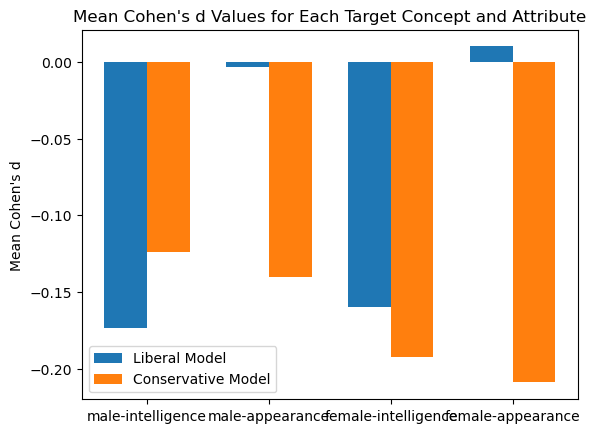

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# define the x values
x = np.arange(4)

# calculate the mean Cohen's d values across all attribute words for each target concept and attribute
model1_values = [np.mean(cohens_d_male_intelligence_model1), np.mean(cohens_d_male_appearance_model1), 
                 np.mean(cohens_d_female_intelligence_model1), np.mean(cohens_d_female_appearance_model1)]
model2_values = [np.mean(cohens_d_male_intelligence_model2), np.mean( cohens_d_male_appearance_model2), 
                 np.mean(cohens_d_female_intelligence_model2), np.mean(cohens_d_female_appearance_model2)]

# define the width of each bar
width = 0.35

# create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Liberal Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Conservative Model')

# add labels, title, and legend
ax.set_ylabel("Mean Cohen's d")
ax.set_title("Mean Cohen's d Values for Each Target Concept and Attribute")
ax.set_xticks(x)
ax.set_xticklabels(["male-intelligence", "male-appearance", "female-intelligence", "female-appearance"])
ax.legend()

plt.show()


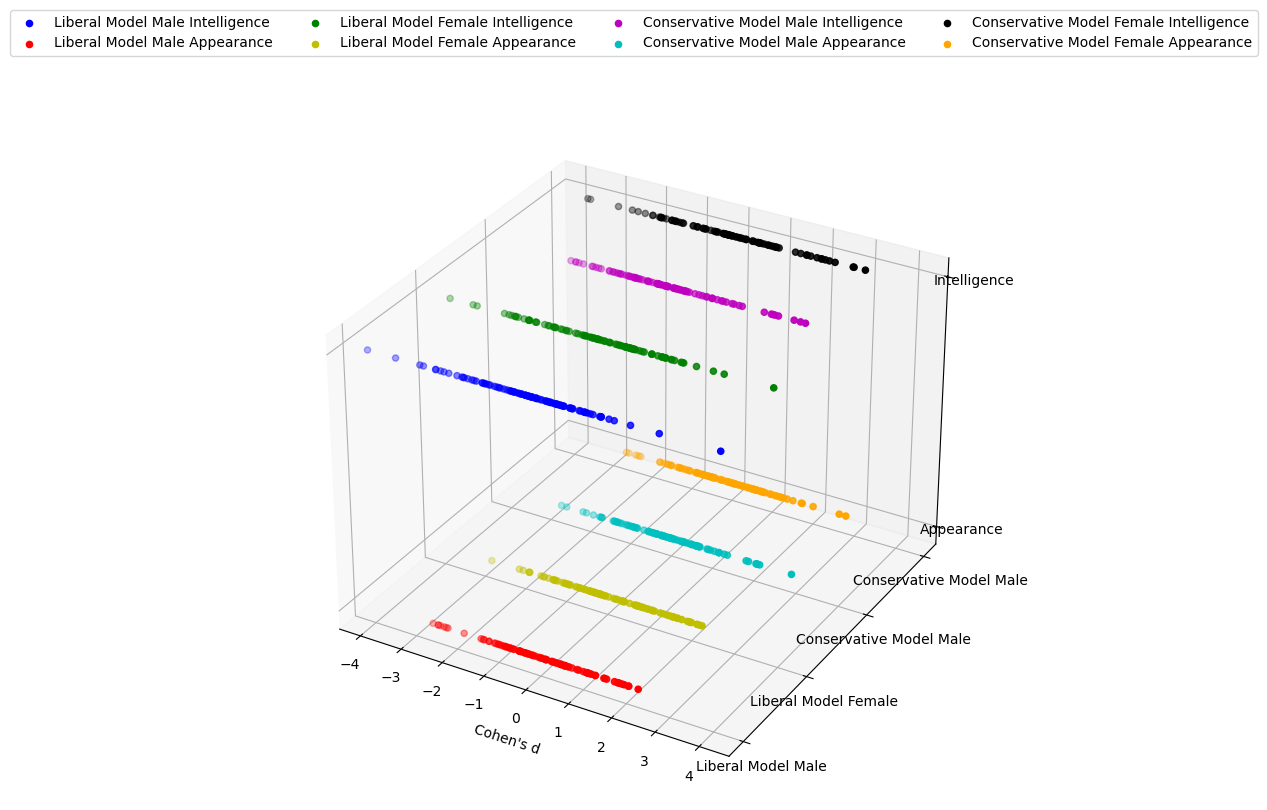

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Cohen's d values for males and females with respect to intelligence and appearance terms in both models
model1_male_intelligence = cohens_d_male_intelligence_model1
model1_male_appearance = cohens_d_male_appearance_model1
model1_female_intelligence = cohens_d_female_intelligence_model1
model1_female_appearance = cohens_d_female_appearance_model1
model2_male_intelligence = cohens_d_male_intelligence_model2
model2_male_appearance = cohens_d_male_appearance_model2
model2_female_intelligence = cohens_d_female_intelligence_model2
model2_female_appearance = cohens_d_female_appearance_model2

# Scatter plot for model 1
ax.scatter(model1_male_intelligence, np.zeros_like(model1_male_intelligence), np.ones_like(model1_male_intelligence), 
           marker='o', color='b', label="Liberal Model Male Intelligence")
ax.scatter(model1_male_appearance, np.zeros_like(model1_male_appearance), np.zeros_like(model1_male_appearance), 
           marker='o', color='r', label="Liberal Model Male Appearance")
ax.scatter(model1_female_intelligence, np.ones_like(model1_female_intelligence), np.ones_like(model1_female_intelligence), 
           marker='o', color='g', label="Liberal Model Female Intelligence")
ax.scatter(model1_female_appearance, np.ones_like(model1_female_appearance), np.zeros_like(model1_female_appearance), 
           marker='o', color='y', label="Liberal Model Female Appearance")

# Scatter plot for model 2
ax.scatter(model2_male_intelligence, 2*np.ones_like(model2_male_intelligence), np.ones_like(model2_male_intelligence), 
           marker='o', color='m', label="Conservative Model Male Intelligence")
ax.scatter(model2_male_appearance, 2*np.ones_like(model2_male_appearance), np.zeros_like(model2_male_appearance), 
           marker='o', color='c', label="Conservative Model Male Appearance")
ax.scatter(model2_female_intelligence, 3*np.ones_like(model2_female_intelligence), np.ones_like(model2_female_intelligence), 
           marker='o', color='k', label="Conservative Model Female Intelligence")
ax.scatter(model2_female_appearance, 3*np.ones_like(model2_female_appearance), np.zeros_like(model2_female_appearance), 
           marker='o', color='orange', label="Conservative Model Female Appearance")

# Set the axis labels and legend
ax.set_xlabel("Cohen's d")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Liberal Model Male', 'Liberal Model Female', 'Conservative Model Male', 'Conservative Model Male'])
ax.set_zticks([0,1])
ax.set_zticklabels(['Appearance', 'Intelligence'])

# Adjust legend position
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.show()


## Intelligence vs Appearance w.r.t White vs Black

In [85]:
# Define the word groups
word_sets = {'intelligence_terms' : ['precocious', 'resourceful', 'inquisitive', 'genius', 'inventive', 
                                   'astute', 'adaptable', 'reflective'],
'appearance_terms' : ['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual',
                                 'gorgeous', 'slim'],
'white_terms':['caucasian', 'white'],'black_terms': ['african', 'black']}


In [86]:
import numpy as np

# Calculate the means and standard deviations for the intelligence and appearance terms for first model
model1_intelligence_mean = np.mean([model1.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model1_intelligence_std = np.std([model1.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model1_appearance_mean = np.mean([model1.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)
model1_appearance_std = np.std([model1.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)


# Calculate the means and standard deviations for the intelligence and appearance terms for second model
model2_intelligence_mean = np.mean([model2.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model2_intelligence_std = np.std([model2.get_word_vector(w) for w in word_sets['intelligence_terms']], axis=0)
model2_appearance_mean = np.mean([model2.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)
model2_appearance_std = np.std([model2.get_word_vector(w) for w in word_sets['appearance_terms']], axis=0)



# Calculate the means and standard deviations for the white and black terms of first model 
model1_white_mean = np.mean([model1.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model1_white_std = np.std([model1.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model1_black_mean = np.mean([model1.get_word_vector(w) for w in word_sets['black_terms']], axis=0)
model1_black_std = np.std([model1.get_word_vector(w) for w in word_sets['black_terms']], axis=0)


# Calculate the means and standard deviations for the white and black terms of first model 
model2_white_mean = np.mean([model2.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model2_white_std = np.std([model2.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model2_black_mean = np.mean([model2.get_word_vector(w) for w in word_sets['black_terms']], axis=0)
model2_black_std = np.std([model2.get_word_vector(w) for w in word_sets['black_terms']], axis=0)


In [87]:
# Calculate Cohen's d for white and black with respect to intelligence and appearance terms for model 1
s_pooled_intelligence_white_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_appearance_white_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_intelligence_black_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_appearance_black_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))

cohens_d_white_intelligence_model1 = (model1_white_mean - model1_intelligence_mean) / s_pooled_intelligence_white_model1
cohens_d_white_appearance_model1 = (model1_white_mean - model1_appearance_mean) / s_pooled_appearance_white_model1
cohens_d_black_intelligence_model1 = (model1_black_mean - model1_intelligence_mean) / s_pooled_intelligence_black_model1
cohens_d_black_appearance_model1 = (model1_black_mean - model1_appearance_mean) / s_pooled_appearance_black_model1

# Calculate Cohen's d for white and black with respect to intelligence and appearance terms for model 2
s_pooled_intelligence_white_model2 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_appearance_white_model2 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_intelligence_black_model2 = np.sqrt(((len(word_sets['black_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_appearance_black_model2 = np.sqrt(((len(word_sets['black_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))


cohens_d_white_intelligence_model2 = (model2_white_mean - model2_intelligence_mean) / s_pooled_intelligence_white_model2
cohens_d_white_appearance_model2 = (model2_white_mean - model2_appearance_mean) / s_pooled_appearance_white_model2
cohens_d_black_intelligence_model2 = (model2_black_mean - model2_intelligence_mean) / s_pooled_intelligence_black_model2
cohens_d_black_appearance_model2 = (model2_black_mean - model2_appearance_mean) / s_pooled_appearance_black_model2


In [88]:
print("Cohen's d for white with respect to intelligence terms for model 1:", cohens_d_white_intelligence_model1)
print("Cohen's d for white with respect to appearance terms for model 1:", cohens_d_white_appearance_model1)
print("Cohen's d for black with respect to intelligence terms for model 1:", cohens_d_black_intelligence_model1)
print("Cohen's d for black with respect to appearance terms for model 1:", cohens_d_black_appearance_model1)

print("Cohen's d for white with respect to intelligence terms for model 2:", cohens_d_white_intelligence_model2)
print("Cohen's d for white with respect to appearance terms for model 2:", cohens_d_white_appearance_model2)
print("Cohen's d for black with respect to intelligence terms for model 2:", cohens_d_black_intelligence_model2)
print("Cohen's d for black with respect to appearance terms for model 2:", cohens_d_black_appearance_model2)


Cohen's d for white with respect to intelligence terms for model 1: [ 0.36900386 -2.586911   -8.42817    -2.685683   11.690649   -0.19102784
 -0.43380183 -0.22029899 -1.1902694   0.23319718 -5.0356245  -1.7887548
  0.92403454 -6.3583813  -0.28448004 -1.3504574   1.6849817  -0.67214316
 -0.18228763 -1.4280174  -0.49134496 -4.183237    2.5951858   0.66468954
 -1.876196   -7.8651943  -1.9655477   0.19052805 -1.5280526   1.0753725
 -1.7155935  -0.77917093 -1.6618028  -2.5619326  -0.8551402  12.64714
  4.498289   -0.64172375  1.0416799   4.4605484   0.86545974  4.5419693
 -9.994461   -0.75689834  0.8402394   2.211637    0.32785085  2.294845
  1.4967152   3.3949912  -1.5540367   0.0639888  -0.03715939 -3.580982
  0.930408    2.6621757  -0.56228554  5.4608717   0.80889213  0.45280495
  4.295774   -2.4379797  -2.6719546  -0.565237   -4.129609    2.6164637
 -0.7935732  -4.937022   -5.233035    1.370939    3.8016768   0.5786793
 -5.95841     3.973263    3.090826   14.225191   -1.9942192   1.8019

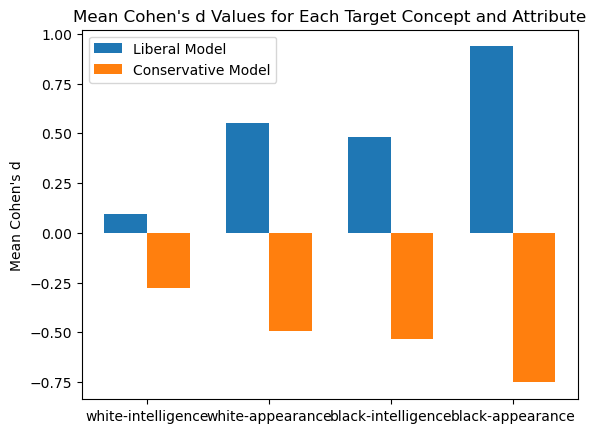

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# define the x values
x = np.arange(4)

# calculate the mean Cohen's d values across all attribute words for each target concept and attribute
model1_values = [np.mean(cohens_d_white_intelligence_model1), np.mean(cohens_d_white_appearance_model1), 
                 np.mean(cohens_d_black_intelligence_model1), np.mean(cohens_d_black_appearance_model1)]
model2_values = [np.mean(cohens_d_white_intelligence_model2), np.mean( cohens_d_white_appearance_model2), 
                 np.mean(cohens_d_black_intelligence_model2), np.mean(cohens_d_black_appearance_model2)]

# define the width of each bar
width = 0.35

# create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Liberal Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Conservative Model')

# add labels, title, and legend
ax.set_ylabel("Mean Cohen's d")
ax.set_title("Mean Cohen's d Values for Each Target Concept and Attribute")
ax.set_xticks(x)
ax.set_xticklabels(["white-intelligence", "white-appearance", "black-intelligence", "black-appearance"])
ax.legend()

plt.show()


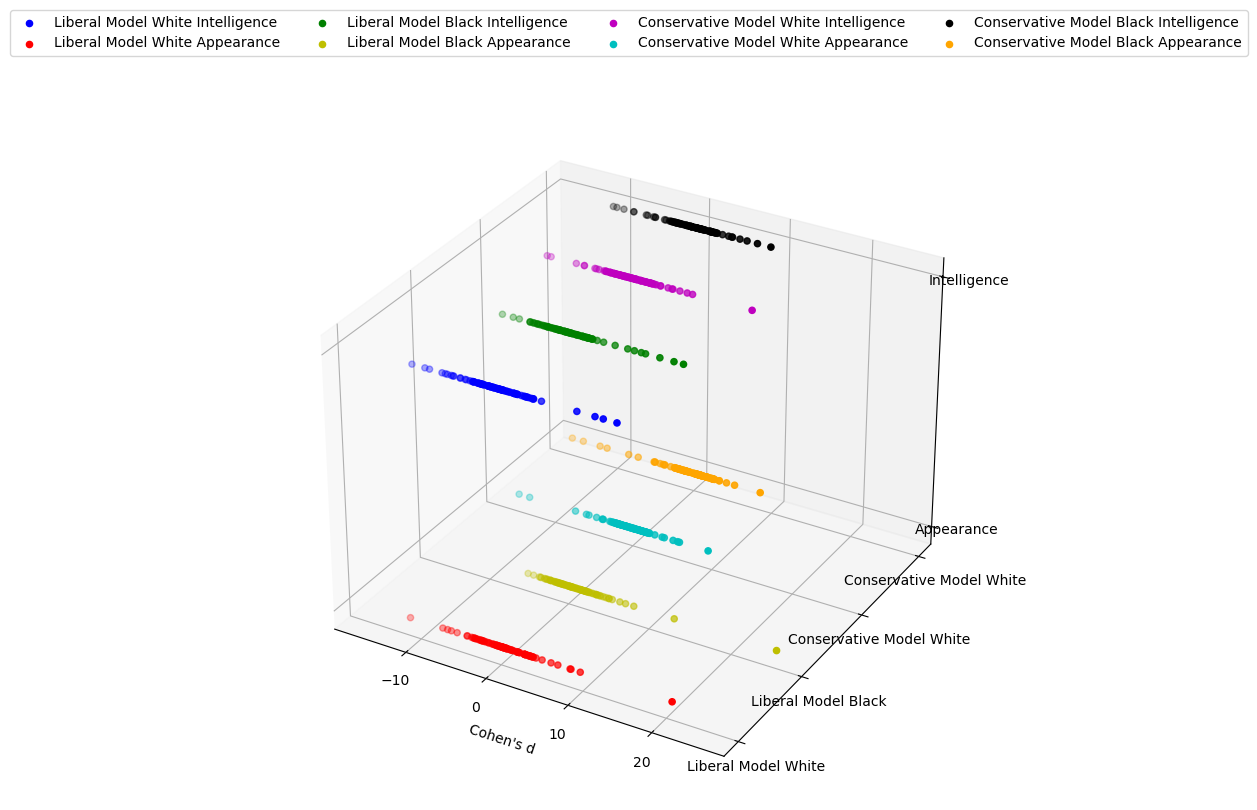

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Cohen's d values for males and females with respect to intelligence and appearance terms in both models
model1_white_intelligence = cohens_d_white_intelligence_model1
model1_white_appearance = cohens_d_white_appearance_model1
model1_black_intelligence = cohens_d_black_intelligence_model1
model1_black_appearance = cohens_d_black_appearance_model1
model2_white_intelligence = cohens_d_white_intelligence_model2
model2_white_appearance = cohens_d_white_appearance_model2
model2_black_intelligence = cohens_d_black_intelligence_model2
model2_black_appearance = cohens_d_black_appearance_model2

# Scatter plot for model 1
ax.scatter(model1_white_intelligence, np.zeros_like(model1_white_intelligence), np.ones_like(model1_white_intelligence), 
           marker='o', color='b', label="Liberal Model White Intelligence")
ax.scatter(model1_white_appearance, np.zeros_like(model1_white_appearance), np.zeros_like(model1_white_appearance), 
           marker='o', color='r', label="Liberal Model White Appearance")
ax.scatter(model1_black_intelligence, np.ones_like(model1_black_intelligence), np.ones_like(model1_black_intelligence), 
           marker='o', color='g', label="Liberal Model Black Intelligence")
ax.scatter(model1_black_appearance, np.ones_like(model1_black_appearance), np.zeros_like(model1_black_appearance), 
           marker='o', color='y', label="Liberal Model Black Appearance")

# Scatter plot for model 2
ax.scatter(model2_white_intelligence, 2*np.ones_like(model2_white_intelligence), np.ones_like(model2_white_intelligence), 
           marker='o', color='m', label="Conservative Model White Intelligence")
ax.scatter(model2_white_appearance, 2*np.ones_like(model2_white_appearance), np.zeros_like(model2_white_appearance), 
           marker='o', color='c', label="Conservative Model White Appearance")
ax.scatter(model2_black_intelligence, 3*np.ones_like(model2_black_intelligence), np.ones_like(model2_black_intelligence), 
           marker='o', color='k', label="Conservative Model Black Intelligence")
ax.scatter(model2_black_appearance, 3*np.ones_like(model2_black_appearance), np.zeros_like(model2_black_appearance), 
           marker='o', color='orange', label="Conservative Model Black Appearance")

# Set the axis labels and legend
ax.set_xlabel("Cohen's d")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Liberal Model White', 'Liberal Model Black', 'Conservative Model White', 'Conservative Model White'])
ax.set_zticks([0,1])
ax.set_zticklabels(['Appearance', 'Intelligence'])

# Adjust legend position
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.show()


## Normal vs Abnormal w.r.t Male vs Female

In [92]:
word_sets = {'normal_terms': ['correct', 'correctness', 'legitimate', 'logical', 'valid', 'legal',
                             'normal', 'natural'],
             'abnormal_terms': ['bad', 'wrong', 'deficient', 'dissatisfactory', 'disgusting', 'lame',
                               'lousy', 'unacceptable'],
               'male_terms': ['man', 'male', 'boy', 'brother', 'father', 'he', 'him', 'his', 'son'],
               'female_terms': ['woman', 'female', 'girl', 'sister', 'mother', 'she', 'her', 'hers', 'daughter']}


In [93]:
import numpy as np

# Calculate the means and standard deviations for the normal and abnormal terms for first model
model1_normal_mean = np.mean([model1.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model1_normal_std = np.std([model1.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model1_abnormal_mean = np.mean([model1.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)
model1_abnormal_std = np.std([model1.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)


# Calculate the means and standard deviations for the normal and abnormal terms for second model
model2_normal_mean = np.mean([model2.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model2_normal_std = np.std([model2.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model2_abnormal_mean = np.mean([model2.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)
model2_abnormal_std = np.std([model2.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)



# Calculate the means and standard deviations for the male and female terms of first model 
model1_male_mean = np.mean([model1.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model1_male_std = np.std([model1.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model1_female_mean = np.mean([model1.get_word_vector(w) for w in word_sets['female_terms']], axis=0)
model1_female_std = np.std([model1.get_word_vector(w) for w in word_sets['female_terms']], axis=0)


# Calculate the means and standard deviations for the male and female terms of first model 
model2_male_mean = np.mean([model2.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model2_male_std = np.std([model2.get_word_vector(w) for w in word_sets['male_terms']], axis=0)
model2_female_mean = np.mean([model2.get_word_vector(w) for w in word_sets['female_terms']], axis=0)
model2_female_std = np.std([model2.get_word_vector(w) for w in word_sets['female_terms']], axis=0)


In [94]:
# Calculate Cohen's d for male and female with respect to normal and abnormal terms for model 1
s_pooled_normal_male_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_abnormal_male_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_normal_female_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_abnormal_female_model1 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model1_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model1_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))

cohens_d_male_normal_model1 = (model1_male_mean - model1_normal_mean) / s_pooled_normal_male_model1
cohens_d_male_abnormal_model1 = (model1_male_mean - model1_abnormal_mean) / s_pooled_abnormal_male_model1
cohens_d_female_normal_model1 = (model1_female_mean - model1_normal_mean) / s_pooled_normal_female_model1
cohens_d_female_abnormal_model1 = (model1_female_mean - model1_abnormal_mean) / s_pooled_abnormal_female_model1

# Calculate Cohen's d for male and female with respect to normal and abnormal terms for model 2
s_pooled_normal_male_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_abnormal_male_model2 = np.sqrt(((len(word_sets['male_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_normal_female_model2 = np.sqrt(((len(word_sets['female_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))
s_pooled_abnormal_female_model2 = np.sqrt(((len(word_sets['female_terms']) - 1) * np.square(model2_male_std) + (len(word_sets['female_terms']) - 1) * np.square(model2_female_std)) / (len(word_sets['male_terms']) + len(word_sets['female_terms']) - 2))


cohens_d_male_normal_model2 = (model2_male_mean - model2_normal_mean) / s_pooled_normal_male_model2
cohens_d_male_abnormal_model2 = (model2_male_mean - model2_abnormal_mean) / s_pooled_abnormal_male_model2
cohens_d_female_normal_model2 = (model2_female_mean - model2_normal_mean) / s_pooled_normal_female_model2
cohens_d_female_abnormal_model2 = (model2_female_mean - model2_abnormal_mean) / s_pooled_abnormal_female_model2


In [95]:
print("Cohen's d for male with respect to normal terms for model 1:", cohens_d_male_normal_model1)
print("Cohen's d for male with respect to abnormal terms for model 1:", cohens_d_male_abnormal_model1)
print("Cohen's d for female with respect to normal terms for model 1:", cohens_d_female_normal_model1)
print("Cohen's d for female with respect to abnormal terms for model 1:", cohens_d_female_abnormal_model1)

print("Cohen's d for male with respect to normal terms for model 2:", cohens_d_male_normal_model2)
print("Cohen's d for male with respect to abnormal terms for model 2:", cohens_d_male_abnormal_model2)
print("Cohen's d for female with respect to normal terms for model 2:", cohens_d_female_normal_model2)
print("Cohen's d for female with respect to abnormal terms for model 2:", cohens_d_female_abnormal_model2)


Cohen's d for male with respect to normal terms for model 1: [ 0.6586204  -2.045052    0.44773513 -1.1107821   0.19754535  0.93946904
 -0.7631784   0.17488933  1.8543643  -0.09880025  0.32184348 -1.146106
  0.5589772  -0.34257862 -0.08498259  2.1441643  -0.9741416  -1.1927497
  0.6418067   0.5012205  -2.2934039   0.97607833  0.7560815  -0.72718436
 -3.3915138   0.11210319 -3.1414063  -1.3925545  -1.8945264  -0.4191718
 -0.65857935 -0.4288197  -2.2071533  -0.16124491  1.9741085   4.210989
  0.92061764 -0.97174126 -0.5870284   1.8860416   1.4728594  -1.7555758
  1.7029557  -1.7354643   1.5003238  -0.55184007 -0.41783905  0.43925416
 -0.00424145  0.47399095  1.3545135  -0.93091196  0.28616676 -1.5710382
  2.2000477  -1.4318933  -1.1748804  -0.43946853  0.7881109  -0.44981557
 -2.6342132  -2.0458214  -0.44297424 -0.53667843  0.11244887 -0.660369
 -0.1213658  -1.7136067  -1.4707288   0.98687226  1.2731686   1.3739591
 -0.6044406  -0.58017707  3.6925197  -1.22342    -0.7190968   0.11132012
 

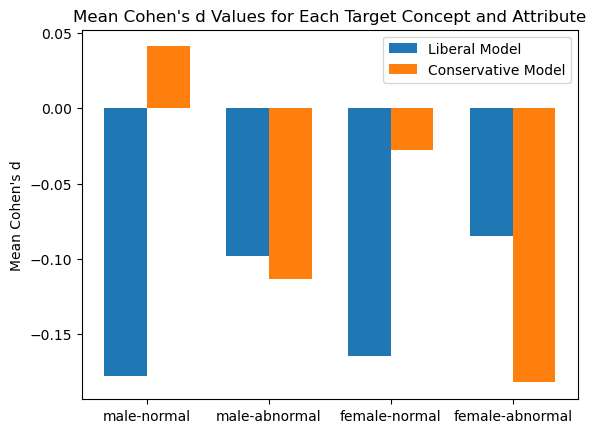

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# define the x values
x = np.arange(4)

# calculate the mean Cohen's d values across all attribute words for each target concept and attribute
model1_values = [np.mean(cohens_d_male_normal_model1), np.mean(cohens_d_male_abnormal_model1), 
                 np.mean(cohens_d_female_normal_model1), np.mean(cohens_d_female_abnormal_model1)]
model2_values = [np.mean(cohens_d_male_normal_model2), np.mean( cohens_d_male_abnormal_model2), 
                 np.mean(cohens_d_female_normal_model2), np.mean(cohens_d_female_abnormal_model2)]

# define the width of each bar
width = 0.35

# create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Liberal Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Conservative Model')

# add labels, title, and legend
ax.set_ylabel("Mean Cohen's d")
ax.set_title("Mean Cohen's d Values for Each Target Concept and Attribute")
ax.set_xticks(x)
ax.set_xticklabels(["male-normal", "male-abnormal", "female-normal", "female-abnormal"])
ax.legend()

plt.show()


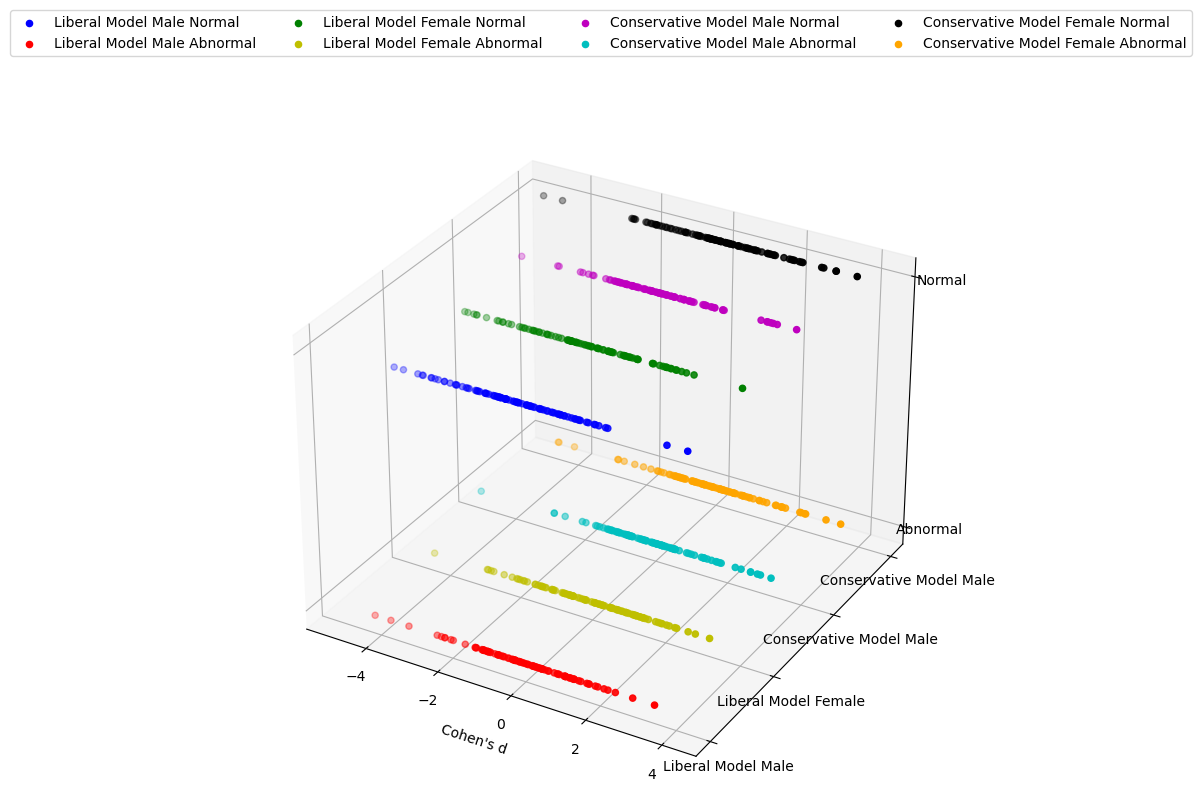

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Cohen's d values for males and females with respect to normal and abnormal terms in both models
model1_male_normal = cohens_d_male_normal_model1
model1_male_abnormal = cohens_d_male_abnormal_model1
model1_female_normal = cohens_d_female_normal_model1
model1_female_abnormal = cohens_d_female_abnormal_model1
model2_male_normal = cohens_d_male_normal_model2
model2_male_abnormal = cohens_d_male_abnormal_model2
model2_female_normal = cohens_d_female_normal_model2
model2_female_abnormal = cohens_d_female_abnormal_model2

# Scatter plot for model 1
ax.scatter(model1_male_normal, np.zeros_like(model1_male_normal), np.ones_like(model1_male_normal), 
           marker='o', color='b', label="Liberal Model Male Normal")
ax.scatter(model1_male_abnormal, np.zeros_like(model1_male_abnormal), np.zeros_like(model1_male_abnormal), 
           marker='o', color='r', label="Liberal Model Male Abnormal")
ax.scatter(model1_female_normal, np.ones_like(model1_female_normal), np.ones_like(model1_female_normal), 
           marker='o', color='g', label="Liberal Model Female Normal")
ax.scatter(model1_female_abnormal, np.ones_like(model1_female_abnormal), np.zeros_like(model1_female_abnormal), 
           marker='o', color='y', label="Liberal Model Female Abnormal")

# Scatter plot for model 2
ax.scatter(model2_male_normal, 2*np.ones_like(model2_male_normal), np.ones_like(model2_male_normal), 
           marker='o', color='m', label="Conservative Model Male Normal")
ax.scatter(model2_male_abnormal, 2*np.ones_like(model2_male_abnormal), np.zeros_like(model2_male_abnormal), 
           marker='o', color='c', label="Conservative Model Male Abnormal")
ax.scatter(model2_female_normal, 3*np.ones_like(model2_female_normal), np.ones_like(model2_female_normal), 
           marker='o', color='k', label="Conservative Model Female Normal")
ax.scatter(model2_female_abnormal, 3*np.ones_like(model2_female_abnormal), np.zeros_like(model2_female_abnormal), 
           marker='o', color='orange', label="Conservative Model Female Abnormal")

# Set the axis labels and legend
ax.set_xlabel("Cohen's d")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Liberal Model Male', 'Liberal Model Female', 'Conservative Model Male', 'Conservative Model Male'])
ax.set_zticks([0,1])
ax.set_zticklabels(['Abnormal', 'Normal'])

# Adjust legend position
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.show()


## Normal vs Abnormal w.r.t White and black

In [99]:

word_sets = {'normal_terms': ['correct', 'correctness', 'legitimate', 'logical', 'valid', 'legal',
                             'normal', 'natural'],
             'abnormal_terms': ['bad', 'wrong', 'deficient', 'dissatisfactory', 'disgusting', 'lame',
                               'lousy', 'unacceptable'],
               'white_terms':['caucasian', 'white'],
               'black_terms': ['african', 'black']}


In [100]:
import numpy as np

# Calculate the means and standard deviations for the normal and abnormal terms for first model
model1_normal_mean = np.mean([model1.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model1_normal_std = np.std([model1.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model1_abnormal_mean = np.mean([model1.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)
model1_abnormal_std = np.std([model1.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)


# Calculate the means and standard deviations for the normal and abnormal terms for second model
model2_normal_mean = np.mean([model2.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model2_normal_std = np.std([model2.get_word_vector(w) for w in word_sets['normal_terms']], axis=0)
model2_abnormal_mean = np.mean([model2.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)
model2_abnormal_std = np.std([model2.get_word_vector(w) for w in word_sets['abnormal_terms']], axis=0)



# Calculate the means and standard deviations for the white and black terms of first model 
model1_white_mean = np.mean([model1.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model1_white_std = np.std([model1.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model1_black_mean = np.mean([model1.get_word_vector(w) for w in word_sets['black_terms']], axis=0)
model1_black_std = np.std([model1.get_word_vector(w) for w in word_sets['black_terms']], axis=0)


# Calculate the means and standard deviations for the white and black terms of first model 
model2_white_mean = np.mean([model2.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model2_white_std = np.std([model2.get_word_vector(w) for w in word_sets['white_terms']], axis=0)
model2_black_mean = np.mean([model2.get_word_vector(w) for w in word_sets['black_terms']], axis=0)
model2_black_std = np.std([model2.get_word_vector(w) for w in word_sets['black_terms']], axis=0)


In [101]:
# Calculate Cohen's d for white and black with respect to normal and abnormal terms for model 1
s_pooled_normal_white_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_abnormal_white_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_normal_black_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_abnormal_black_model1 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model1_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model1_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))

cohens_d_white_normal_model1 = (model1_white_mean - model1_normal_mean) / s_pooled_normal_white_model1
cohens_d_white_abnormal_model1 = (model1_white_mean - model1_abnormal_mean) / s_pooled_abnormal_white_model1
cohens_d_black_normal_model1 = (model1_black_mean - model1_normal_mean) / s_pooled_normal_black_model1
cohens_d_black_abnormal_model1 = (model1_black_mean - model1_abnormal_mean) / s_pooled_abnormal_black_model1

# Calculate Cohen's d for white and black with respect to normal and abnormal terms for model 2
s_pooled_normal_white_model2 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_abnormal_white_model2 = np.sqrt(((len(word_sets['white_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_normal_black_model2 = np.sqrt(((len(word_sets['black_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))
s_pooled_abnormal_black_model2 = np.sqrt(((len(word_sets['black_terms']) - 1) * np.square(model2_white_std) + (len(word_sets['black_terms']) - 1) * np.square(model2_black_std)) / (len(word_sets['white_terms']) + len(word_sets['black_terms']) - 2))


cohens_d_white_normal_model2 = (model2_white_mean - model2_normal_mean) / s_pooled_normal_white_model2
cohens_d_white_abnormal_model2 = (model2_white_mean - model2_abnormal_mean) / s_pooled_abnormal_white_model2
cohens_d_black_normal_model2 = (model2_black_mean - model2_normal_mean) / s_pooled_normal_black_model2
cohens_d_black_abnormal_model2 = (model2_black_mean - model2_abnormal_mean) / s_pooled_abnormal_black_model2


In [102]:
print("Cohen's d for white with respect to normal terms for model 1:", cohens_d_white_normal_model1)
print("Cohen's d for white with respect to abnormal terms for model 1:", cohens_d_white_abnormal_model1)
print("Cohen's d for black with respect to normal terms for model 1:", cohens_d_black_normal_model1)
print("Cohen's d for black with respect to abnormal terms for model 1:", cohens_d_black_abnormal_model1)

print("Cohen's d for white with respect to normal terms for model 2:", cohens_d_white_normal_model2)
print("Cohen's d for white with respect to abnormal terms for model 2:", cohens_d_white_abnormal_model2)
print("Cohen's d for black with respect to normal terms for model 2:", cohens_d_black_normal_model2)
print("Cohen's d for black with respect to abnormal terms for model 2:", cohens_d_black_abnormal_model2)


Cohen's d for white with respect to normal terms for model 1: [  0.19140926  -2.6360843  -12.589484    -2.3129547    3.0347626
   1.1098107   -0.80745745   0.17604335   0.1037559    0.03576403
   0.79605496  -1.7057776    1.1233256   -9.82253     -0.26187876
   5.4247622    1.3485029   -3.0130923   -0.8899749   -2.6256804
   0.78063804  -2.5553617    3.43722     -0.15617177  -3.0805633
  -2.1254065   -3.2515848    0.68115264  -4.0926437   -1.5371482
   0.71131337   0.16264953  -1.6509612    1.8739154    0.94015056
  12.923883     4.358567    -1.8355172   -3.7276495    4.99739
   2.8153248    1.4218338   -5.6236944  -14.297144     2.4498727
   1.9001361   -0.25737768   2.2859957    3.9994466    3.714993
   0.1000165   -0.6598825   -0.659952    -0.47196496   2.400116
   1.1438601   -2.8116562    4.8613405    1.4223253   -0.10609933
  -9.032844    -3.5408018   -2.1703835   -1.6001619   -0.14881201
   1.7214988   -0.24735035  -6.805344    -5.9656563    3.6394594
   2.0114326    0.7401403  

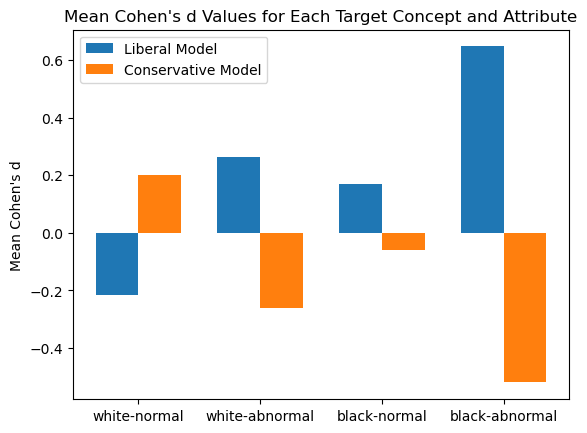

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# define the x values
x = np.arange(4)

# calculate the mean Cohen's d values across all attribute words for each target concept and attribute
model1_values = [np.mean(cohens_d_white_normal_model1), np.mean(cohens_d_white_abnormal_model1), 
                 np.mean(cohens_d_black_normal_model1), np.mean(cohens_d_black_abnormal_model1)]
model2_values = [np.mean(cohens_d_white_normal_model2), np.mean( cohens_d_white_abnormal_model2), 
                 np.mean(cohens_d_black_normal_model2), np.mean(cohens_d_black_abnormal_model2)]

# define the width of each bar
width = 0.35

# create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Liberal Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Conservative Model')

# add labels, title, and legend
ax.set_ylabel("Mean Cohen's d")
ax.set_title("Mean Cohen's d Values for Each Target Concept and Attribute")
ax.set_xticks(x)
ax.set_xticklabels(["white-normal", "white-abnormal", "black-normal", "black-abnormal"])
ax.legend()

plt.show()


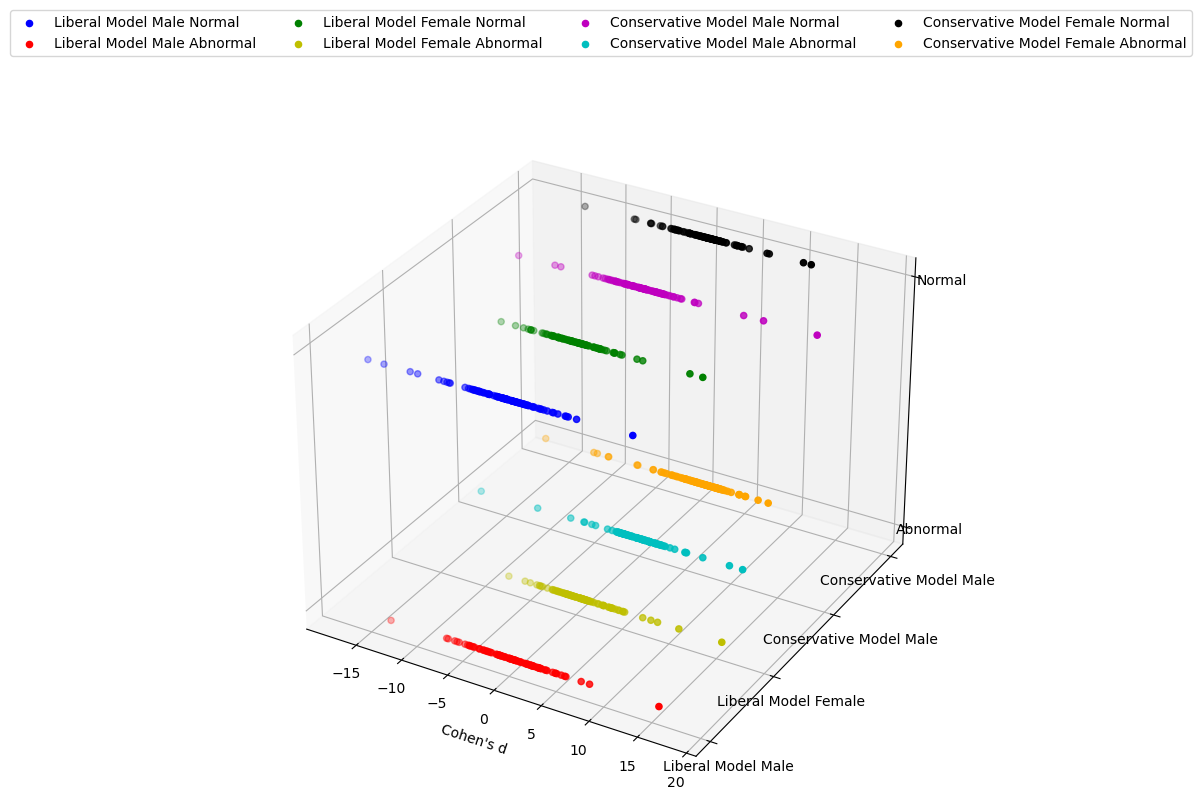

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Cohen's d values for males and females with respect to normal and abnormal terms in both models
model1_white_normal = cohens_d_white_normal_model1
model1_white_abnormal = cohens_d_white_abnormal_model1
model1_black_normal = cohens_d_black_normal_model1
model1_black_abnormal = cohens_d_black_abnormal_model1
model2_white_normal = cohens_d_white_normal_model2
model2_white_abnormal = cohens_d_white_abnormal_model2
model2_black_normal = cohens_d_black_normal_model2
model2_black_abnormal = cohens_d_black_abnormal_model2

# Scatter plot for model 1
ax.scatter(model1_white_normal, np.zeros_like(model1_white_normal), np.ones_like(model1_white_normal), 
           marker='o', color='b', label="Liberal Model Male Normal")
ax.scatter(model1_white_abnormal, np.zeros_like(model1_white_abnormal), np.zeros_like(model1_white_abnormal), 
           marker='o', color='r', label="Liberal Model Male Abnormal")
ax.scatter(model1_black_normal, np.ones_like(model1_black_normal), np.ones_like(model1_black_normal), 
           marker='o', color='g', label="Liberal Model Female Normal")
ax.scatter(model1_black_abnormal, np.ones_like(model1_black_abnormal), np.zeros_like(model1_black_abnormal), 
           marker='o', color='y', label="Liberal Model Female Abnormal")

# Scatter plot for model 2
ax.scatter(model2_white_normal, 2*np.ones_like(model2_white_normal), np.ones_like(model2_white_normal), 
           marker='o', color='m', label="Conservative Model Male Normal")
ax.scatter(model2_white_abnormal, 2*np.ones_like(model2_white_abnormal), np.zeros_like(model2_white_abnormal), 
           marker='o', color='c', label="Conservative Model Male Abnormal")
ax.scatter(model2_black_normal, 3*np.ones_like(model2_black_normal), np.ones_like(model2_black_normal), 
           marker='o', color='k', label="Conservative Model Female Normal")
ax.scatter(model2_black_abnormal, 3*np.ones_like(model2_black_abnormal), np.zeros_like(model2_black_abnormal), 
           marker='o', color='orange', label="Conservative Model Female Abnormal")

# Set the axis labels and legend
ax.set_xlabel("Cohen's d")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Liberal Model Male', 'Liberal Model Female', 'Conservative Model Male', 'Conservative Model Male'])
ax.set_zticks([0,1])
ax.set_zticklabels(['Abnormal', 'Normal'])

# Adjust legend position
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.show()
